In [1]:
import fcwt
import numpy as np
import timeit
from invertiblewavelets import Morlet, LinearFilterBank, Transform
import matplotlib.pyplot as plt

#### Create Test Signals

In [2]:
fs = 100

n10k = 10000
n100k = 100000

#Generate signals
sig_100k = np.sin(2*np.pi*((0.1+(2*np.arange(n100k))/n100k)*(np.arange(n100k)/fs)))
sig_10k = np.sin(2*np.pi*((0.1+(2*np.arange(n10k))/n10k)*(np.arange(n10k)/fs)))

#### Create fCWT Optimization Plan

In [3]:
f0 = 1
f1 = 101
fn300 = 300
fn3000 = 3000

#make sure signal is a numpy float array
sig_100k = np.array(sig_100k, dtype=np.float32)
sig_10k = np.array(sig_10k, dtype=np.float32)

#initialize Morlet wavelet with wavelet parameter (sigma) 2.0
morl = fcwt.Morlet(2.0)

#initialize scales
scales300 = fcwt.Scales(morl, fcwt.FCWT_LINFREQS, fs, f0, f1, fn300)
scales3000 = fcwt.Scales(morl, fcwt.FCWT_LINFREQS, fs, f0, f1, fn3000)

#initialize fcwt
nthreads = 8
use_optimization_plan = True
use_normalization = False
fcwt_obj = fcwt.FCWT(morl, nthreads, use_optimization_plan, use_normalization)

#initialize output array
output_10k_300 = np.zeros((fn300,sig_10k.size), dtype=np.complex64)
output_100k_300 = np.zeros((fn300,sig_100k.size), dtype=np.complex64)
output_10k_3000 = np.zeros((fn3000,sig_100k.size), dtype=np.complex64)
output_100k_3000 = np.zeros((fn3000,sig_100k.size), dtype=np.complex64)

In [4]:
fcwt_obj.create_FFT_optimization_plan(100000,"FFTW_MEASURE")

#### Create Invertible Wavelets

In [12]:
fb_300 = LinearFilterBank(wavelet=Morlet(1,20) , fs=fs, N=10000, real=True, b = 1, M = 300)
fb_3000 = LinearFilterBank(wavelet=Morlet(1,20) , fs=fs, N=10000, real=True, b = 1, M = 3000)
tf_300 = Transform(fb_300.Wfreq)
tf_3000 = Transform(fb_3000.Wfreq)

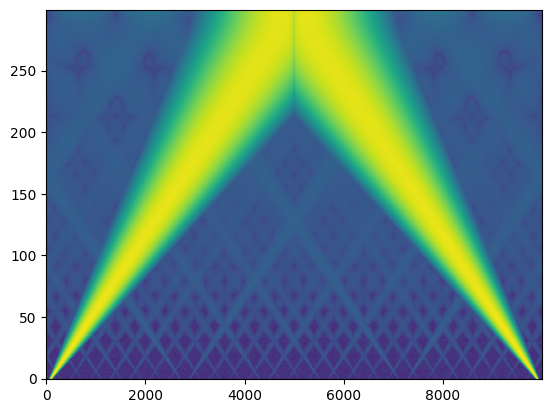

In [13]:
plt.imshow(np.log(np.abs(fb_300.Wfreq)), aspect='auto', origin='lower')

In [ ]:
#10k-300
a = timeit.timeit('fcwt_obj.cwt(sig_10k, scales300, output_10k_300)', number=10, globals=globals())
print("fCWT 10k-300: ", a/10, "seconds")

a = timeit.timeit('tf_300.forward(sig_10k, mode="same")', number=10, globals=globals())
print("Our 10k-300: ", a/10, "seconds")

10k-300:  0.012242120003793388 seconds
10k-300:  0.21389096999773755 seconds


In [8]:

#100k-300
a = timeit.timeit('fcwt_obj.cwt(sig_100k, scales300, output_100k_300)', number=10, globals=globals())
print("fCWT 100k-300: ", a/10, "seconds")

a = timeit.timeit('tf_300.forward(sig_100k, mode="same")', number=10, globals=globals())
print("Our 100k-300: ", a/10, "seconds")

fCWT 100k-300:  0.07928581000305712 seconds
Our 100k-300:  1.0013478299952112 seconds


In [ ]:
#10k-3000
a = timeit.timeit('fcwt_obj.cwt(sig_10k, scales3000, output_10k_3000)', number=10, globals=globals())
print("fCWT 10k-3000: ", a/10, "seconds")

a = timeit.timeit('tf_3000.forward(sig_10k, mode="same")', number=10, globals=globals())
print("Our 10k-3000: ", a/10, "seconds")

10k-3000:  0.10898384999018162 seconds
Our 10k-3000:  2.227714030002244 seconds


In [10]:
#100k-3000
a = timeit.timeit('fcwt_obj.cwt(sig_100k, scales3000, output_100k_3000)', number=10, globals=globals())
print("fCWT 100k-3000: ", a/10, "seconds")

a = timeit.timeit('tf_3000.forward(sig_100k, mode="same")', number=10, globals=globals())
print("Our 100k-3000: ", a/10, "seconds")

fCWT 100k-3000:  0.7597234999993816 seconds
Our 100k-3000:  12.097156570001971 seconds
